#### Text classification with ML

+ assigning text to their predefined category or class
+ grouping text into their classes

+ using udemy dataset
+ predict subkect/category of course title

#### WorkFlow

+ EDA
+ Building features from thd text
    + vectorization (Tfidf, CountVectorizer)
+ Model building
    + Single Approach
    + Pipline Approach

+ Model Evaluatuion
+ Model Interpretation
+ Productionize Model
"""

In [3]:
import pandas as pd
import neattext.functions as nfx

import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


df = pd.read_csv("DATASET/udemy_courses.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'DATASET/udemy_courses.csv'

In [62]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [63]:
df[["course_title", "subject"]]

,course_title,subject
0,Ultimate Investment Banking Course,Business Finance
1,Complete GST Course & Certification - Grow You...,Business Finance
2,Financial Modeling for Business Analysts and C...,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,Business Finance
4,How To Maximize Your Profits Trading Options,Business Finance
...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,Web Development
3674,How To Design A WordPress Website With No Codi...,Web Development
3675,Learn and Build using Polymer,Web Development
3676,CSS Animations: Create Amazing Effects on Your...,Web Development


In [64]:
df['course_title'].apply(nfx.remove_stopwords)

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow Pra...
2        Financial Modeling Business Analysts Consultants
3            Beginner Pro - Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3673     Learn jQuery Scratch - Master JavaScript library
3674                      Design WordPress Website Coding
3675                                  Learn Build Polymer
3676       CSS Animations: Create Amazing Effects Website
3677            MODX CMS Build Websites: Beginner's Guide
Name: course_title, Length: 3678, dtype: object

In [65]:
df['clean_course_title'] = df['course_title'].apply(nfx.remove_stopwords)
df[['clean_course_title', 'course_title']]

,clean_course_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow Pra...,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Pro - Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3673,Learn jQuery Scratch - Master JavaScript library,Learn jQuery from Scratch - Master of JavaScri...
3674,Design WordPress Website Coding,How To Design A WordPress Website With No Codi...
3675,Learn Build Polymer,Learn and Build using Polymer
3676,CSS Animations: Create Amazing Effects Website,CSS Animations: Create Amazing Effects on Your...


In [66]:
df['clean_course_title'] = df['clean_course_title'].apply(nfx.remove_special_characters).str.lower()
df[['clean_course_title', 'course_title']]

,clean_course_title,course_title
0,ultimate investment banking course,Ultimate Investment Banking Course
1,complete gst course certification grow practice,Complete GST Course & Certification - Grow You...
2,financial modeling business analysts consultants,Financial Modeling for Business Analysts and C...
3,beginner pro financial analysis excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,maximize profits trading options,How To Maximize Your Profits Trading Options
...,...,...
3673,learn jquery scratch master javascript library,Learn jQuery from Scratch - Master of JavaScri...
3674,design wordpress website coding,How To Design A WordPress Website With No Codi...
3675,learn build polymer,Learn and Build using Polymer
3676,css animations create amazing effects website,CSS Animations: Create Amazing Effects on Your...


#### Building Fetures from the Text
+ Convert words to vectors of number
+ Tfidf
+ Count
+ Hashvec

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
Xfeatures = df['clean_course_title']
ylabels = df['subject']

In [69]:
Xfeatures

0                      ultimate investment banking course
1       complete gst course  certification  grow practice
2        financial modeling business analysts consultants
3             beginner pro  financial analysis excel 2017
4                        maximize profits trading options
                              ...                        
3673      learn jquery scratch  master javascript library
3674                      design wordpress website coding
3675                                  learn build polymer
3676        css animations create amazing effects website
3677              modx cms build websites beginners guide
Name: clean_course_title, Length: 3678, dtype: object

In [70]:
tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(Xfeatures)

In [71]:
X

<3678x3559 sparse matrix of type '<class 'numpy.float64'>'
	with 18333 stored elements in Compressed Sparse Row format>

In [72]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
df_vec = pd.DataFrame(X.todense(), columns=tfidf_vec.get_feature_names_out())
df_vec

,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Building Model
+ Single Approach*
    - saperately
+ Pipeline Approach
    - Combine

In [74]:
# split our dataset in train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3, random_state=42)

In [75]:
x_train.shape

(2574, 3559)

In [76]:
# build a model
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [77]:
lr_model.score(x_test, y_test)

0.9402173913043478

In [78]:
# Evaluate our model
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [79]:
y_pred = lr_model.predict(x_test)

In [80]:
# confusion matrix :
confusion_matrix(y_pred,y_test)

array([[383,  18,  19,  10],
       [  1, 139,   0,   1],
       [  0,   1, 167,   0],
       [  2,  10,   4, 349]], dtype=int64)

In [81]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


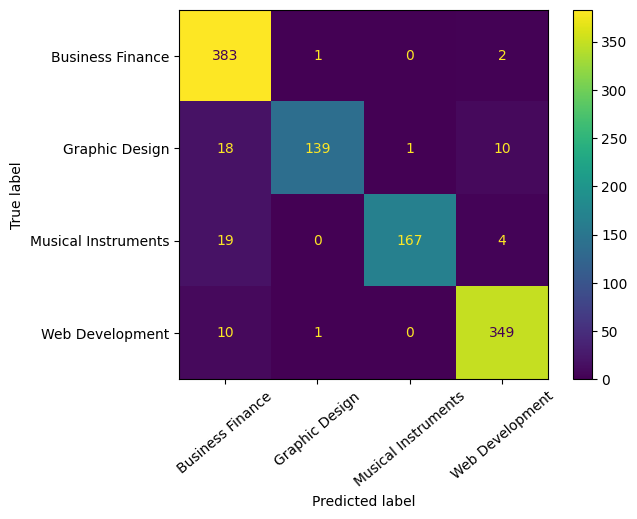

In [82]:
plot_confusion_matrix(lr_model, x_test, y_test,xticks_rotation=40)

In [83]:
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

   Business Finance       0.99      0.89      0.94       430
     Graphic Design       0.83      0.99      0.90       141
Musical Instruments       0.88      0.99      0.93       168
    Web Development       0.97      0.96      0.96       365

           accuracy                           0.94      1104
          macro avg       0.92      0.96      0.93      1104
       weighted avg       0.95      0.94      0.94      1104



In [87]:
# Making a single Prediction
ex = "Building a Simple ML Web App"

In [88]:
def vectorize_text(text):
    my_vec = tfidf_vec.transform([text])
    return my_vec.toarray()

In [90]:
vectorize_text(ex)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [1]:
sample1 = vectorize_text(ex)

NameError: name 'vectorize_text' is not defined

In [93]:
lr_model.predict(sample1)

array(['Web Development'], dtype=object)

In [94]:
lr_model.predict_proba(sample1)

array([[0.05303068, 0.05161384, 0.04939647, 0.84595902]])

In [95]:
lr_model.classes_

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)